# PRCP-1027-Skin Disorder

## Problem Statement 
Task 1:-Prepare a complete data analysis report on the given data.

Task 2:-Create a predictive model  using machine learning techniques to predict the various classes of skin disease. 

Task3:-Suggestions to the Doctors to identify the skin diseases of the patient at the earliest. 

## Domain: Healthcare

## Dataset Information:
This database contains 34 attributes, 33 of which are linear valued and one of them is nominal.The differential diagnosis of erythemato-squamous diseases is a real problem in dermatology. They all share the clinical features of erythema and scaling, with very little differences. The diseases in this group are psoriasis, seboreic dermatitis, lichen planus, pityriasis rosea, cronic dermatitis, and pityriasis rubra pilaris. Usually a biopsy is necessary for the diagnosis but unfortunately these diseases share many histopathological features as well. Another difficulty for the differential diagnosis is that a disease may show the features of another disease at the beginning stage and may have the characteristic features at the following stages. Patients were first evaluated clinically with 12 features. Afterwards, skin samples were taken for the evaluation of 22 histopathological features. The values of the histopathological features are determined by an analysis of the samples under a microscope.In the dataset constructed for this domain, the family history feature has the value 1 if any of these diseases has been observed in the family, and 0 otherwise. The age feature simply represents the age of the patient. Every other feature (clinical and histopathological) was given a degree in the range of 0 to 3. Here, 0 indicates that the feature was not present, 3 indicates the largest amount possible, and 1, 2 indicate the relative intermediate values.The names and id numbers of the patients were recently removed from the database.

## Attribute Information:
Clinical Attributes: (take values 0, 1, 2, 3, unless otherwise indicated)
- 1: erythema
- 2: scaling
- 3: definite borders
- 4: itching
- 5: koebner phenomenon
- 6: polygonal papules
- 7: follicular papules
- 8: oral mucosal involvement
- 9: knee and elbow involvement
- 10: scalp involvement
- 11: family history, (0 or 1)
  Histopathological Attributes: (take values 0, 1, 2, 3)
- 12: melanin incontinence
- 13: eosinophils in the infiltrate
- 14: PNL infiltrate
- 15: fibrosis of the papillary dermis
- 16: exocytosis
- 17: acanthosis
- 18: hyperkeratosis
- 19: parakeratosis
- 20: clubbing of the rete ridges
- 21: elongation of the rete ridges
- 22: thinning of the suprapapillary epidermis
- 23: spongiform pustule
- 24: munro microabcess
- 25: focal hypergranulosis
- 26: disappearance of the granular layer
- 27: vacuolisation and damage of basal layer
- 28: spongiosis
- 29: saw-tooth appearance of retes
- 30: follicular horn plug
- 31: perifollicular parakeratosis
- 32: inflammatory monoluclear inflitrate
- 33: band-like infiltrate
- 34: Age (linear)

### Skin disease 
- psoriasis
- seboreic dermatitis
- lichen planus
- pityriasis rosea
- cronic dermatitis
- pityriasis rubra pilaris

- here the target variable is class and it has 6 unique values that represents Skin Disease 

In [500]:
# Importing Libraries 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings 
warnings.filterwarnings('ignore')

In [501]:
#loading the dataset
df=pd.read_csv(r"C:\Users\salma\Documents\DATA SCIENCE\PROJECT\CAPSTONE DM\skin disorder\PRCP-1028-Skin-Disorder-Prediction\dataset_35_dermatology (1).csv")

### Basic Checks

In [503]:
df.head()

,erythema,scaling,definite_borders,itching,koebner_phenomenon,polygonal_papules,follicular_papules,oral_mucosal_involvement,knee_and_elbow_involvement,scalp_involvement,...,disappearance_of_the_granular_layer,vacuolisation_and_damage_of_basal_layer,spongiosis,saw-tooth_appearance_of_retes,follicular_horn_plug,perifollicular_parakeratosis,inflammatory_monoluclear_inflitrate,band-like_infiltrate,Age,class
0,2,2,0,3,0,0,0,0,1,0,...,0,0,3,0,0,0,1,0,55,2
1,3,3,3,2,1,0,0,0,1,1,...,0,0,0,0,0,0,1,0,8,1
2,2,1,2,3,1,3,0,3,0,0,...,0,2,3,2,0,0,2,3,26,3
3,2,2,2,0,0,0,0,0,3,2,...,3,0,0,0,0,0,3,0,40,1
4,2,3,2,2,2,2,0,2,0,0,...,2,3,2,3,0,0,2,3,45,3


In [504]:
# 35 columns were presented in the data
df.columns

Index(['erythema', 'scaling', 'definite_borders', 'itching',
       'koebner_phenomenon', 'polygonal_papules', 'follicular_papules',
       'oral_mucosal_involvement', 'knee_and_elbow_involvement',
       'scalp_involvement', 'family_history', 'melanin_incontinence',
       'eosinophils_in_the_infiltrate', 'PNL_infiltrate',
       'fibrosis_of_the_papillary_dermis', 'exocytosis', 'acanthosis',
       'hyperkeratosis', 'parakeratosis', 'clubbing_of_the_rete_ridges',
       'elongation_of_the_rete_ridges',
       'thinning_of_the_suprapapillary_epidermis', 'spongiform_pustule',
       'munro_microabcess', 'focal_hypergranulosis',
       'disappearance_of_the_granular_layer',
       'vacuolisation_and_damage_of_basal_layer', 'spongiosis',
       'saw-tooth_appearance_of_retes', 'follicular_horn_plug',
       'perifollicular_parakeratosis', 'inflammatory_monoluclear_inflitrate',
       'band-like_infiltrate', 'Age', 'class'],
      dtype='object')

In [505]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 35 columns):
 #   Column                                    Non-Null Count  Dtype 
---  ------                                    --------------  ----- 
 0   erythema                                  366 non-null    int64 
 1   scaling                                   366 non-null    int64 
 2   definite_borders                          366 non-null    int64 
 3   itching                                   366 non-null    int64 
 4   koebner_phenomenon                        366 non-null    int64 
 5   polygonal_papules                         366 non-null    int64 
 6   follicular_papules                        366 non-null    int64 
 7   oral_mucosal_involvement                  366 non-null    int64 
 8   knee_and_elbow_involvement                366 non-null    int64 
 9   scalp_involvement                         366 non-null    int64 
 10  family_history                            366 non-

In [506]:
# 366 rows and 35 columns
df.shape


(366, 35)

In [507]:
type(df)

pandas.core.frame.DataFrame

In [508]:
#there is no null values
df.isnull().sum()

erythema                                    0
scaling                                     0
definite_borders                            0
itching                                     0
koebner_phenomenon                          0
polygonal_papules                           0
follicular_papules                          0
oral_mucosal_involvement                    0
knee_and_elbow_involvement                  0
scalp_involvement                           0
family_history                              0
melanin_incontinence                        0
eosinophils_in_the_infiltrate               0
PNL_infiltrate                              0
fibrosis_of_the_papillary_dermis            0
exocytosis                                  0
acanthosis                                  0
hyperkeratosis                              0
parakeratosis                               0
clubbing_of_the_rete_ridges                 0
elongation_of_the_rete_ridges               0
thinning_of_the_suprapapillary_epi

In [509]:
#there is no duplicated values
df.duplicated().sum()

0

In [510]:
df['Age'].value_counts()

Age
40    17
50    17
36    16
27    16
22    15
      ..
58     1
49     1
63     1
68     1
75     1
Name: count, Length: 61, dtype: int64

In [511]:
df['class'].value_counts()

class
1    112
3     72
2     61
5     52
4     49
6     20
Name: count, dtype: int64

In [512]:
df['family_history'].value_counts()


family_history
0    320
1     46
Name: count, dtype: int64

- 320 patients have no family history
- 46 patients have family history 

In [514]:
df['erythema'].value_counts()

erythema
2    215
3     90
1     57
0      4
Name: count, dtype: int64

- 215 have large amount possible
- 4 have no issues 

In [516]:
pip install sweetviz


Note: you may need to restart the kernel to use updated packages.


In [517]:
import sweetviz as sv#importing sweetviz library 
my_report = sv.analyze(df)
my_report.show_html()

                                             |                                             | [  0%]   00:00 ->…

Report SWEETVIZ_REPORT.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


### INSIGHTS 
- itiching was not affected 32% of skin disease patients
- koebner_phenomenon is not affected 61% of people it means its not importance in skin disorder
- 81% of people have nothing feel polygonal_papules
- scalp_involvement,follicular_papules,polygonal_papules is not much effected skin disease people
- only 13% of people have famiily history
- follicular_horn_plug,perifollicular_parakeratosis only 4 people have this symptoms from 366 people
- in age category 61 distinct ages is there 
- psoriasis this is the disease have 31% of people

## EDA

In [520]:
df.columns

Index(['erythema', 'scaling', 'definite_borders', 'itching',
       'koebner_phenomenon', 'polygonal_papules', 'follicular_papules',
       'oral_mucosal_involvement', 'knee_and_elbow_involvement',
       'scalp_involvement', 'family_history', 'melanin_incontinence',
       'eosinophils_in_the_infiltrate', 'PNL_infiltrate',
       'fibrosis_of_the_papillary_dermis', 'exocytosis', 'acanthosis',
       'hyperkeratosis', 'parakeratosis', 'clubbing_of_the_rete_ridges',
       'elongation_of_the_rete_ridges',
       'thinning_of_the_suprapapillary_epidermis', 'spongiform_pustule',
       'munro_microabcess', 'focal_hypergranulosis',
       'disappearance_of_the_granular_layer',
       'vacuolisation_and_damage_of_basal_layer', 'spongiosis',
       'saw-tooth_appearance_of_retes', 'follicular_horn_plug',
       'perifollicular_parakeratosis', 'inflammatory_monoluclear_inflitrate',
       'band-like_infiltrate', 'Age', 'class'],
      dtype='object')

In [521]:
df.describe()

,erythema,scaling,definite_borders,itching,koebner_phenomenon,polygonal_papules,follicular_papules,oral_mucosal_involvement,knee_and_elbow_involvement,scalp_involvement,...,focal_hypergranulosis,disappearance_of_the_granular_layer,vacuolisation_and_damage_of_basal_layer,spongiosis,saw-tooth_appearance_of_retes,follicular_horn_plug,perifollicular_parakeratosis,inflammatory_monoluclear_inflitrate,band-like_infiltrate,class
count,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,...,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000
mean,2.068306,1.795082,1.549180,1.366120,0.633880,0.448087,0.166667,0.377049,0.614754,0.519126,...,0.393443,0.464481,0.456284,0.953552,0.453552,0.103825,0.114754,1.866120,0.554645,2.803279
std,0.664753,0.701527,0.907525,1.138299,0.908016,0.957327,0.570588,0.834147,0.982979,0.905639,...,0.849406,0.864899,0.954873,1.130172,0.954744,0.450433,0.488723,0.726108,1.105908,1.597803
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
50%,2.000000,2.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,3.000000
75%,2.000000,2.000000,2.000000,2.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,...,0.000000,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,2.000000,0.000000,4.000000
max,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,...,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,6.000000


In [522]:
# Check unique values in Age
print(df['Age'].unique())

# Check non-numeric values
print(df['Age'].apply(type).value_counts())


['55' '8' '26' '40' '45' '41' '18' '57' '22' '30' '20' '21' '10' '65' '38'
 '23' '17' '51' '42' '44' '33' '43' '50' '34' '?' '15' '46' '62' '35' '48'
 '12' '52' '60' '32' '19' '29' '25' '36' '13' '27' '31' '28' '64' '39'
 '47' '16' '0' '7' '70' '37' '61' '67' '56' '53' '24' '58' '49' '63' '68'
 '9' '75']
Age
<class 'str'>    366
Name: count, dtype: int64


In [523]:
# Convert Age to numeric, replace '?' with NaN
df['Age'] = pd.to_numeric(df['Age'], errors='coerce')

# Check how many NaN values are introduced
print(df['Age'].isnull().sum())


8


In [524]:
# Fill missing Age values with the median
df['Age'].fillna(df['Age'].median(), inplace=True)
df['Age'].isnull().sum()

0

In [525]:
df['Age'] = df['Age'].astype('int64')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 35 columns):
 #   Column                                    Non-Null Count  Dtype
---  ------                                    --------------  -----
 0   erythema                                  366 non-null    int64
 1   scaling                                   366 non-null    int64
 2   definite_borders                          366 non-null    int64
 3   itching                                   366 non-null    int64
 4   koebner_phenomenon                        366 non-null    int64
 5   polygonal_papules                         366 non-null    int64
 6   follicular_papules                        366 non-null    int64
 7   oral_mucosal_involvement                  366 non-null    int64
 8   knee_and_elbow_involvement                366 non-null    int64
 9   scalp_involvement                         366 non-null    int64
 10  family_history                            366 non-null    int6

In [526]:
#get all the columns value counts 
for col in df:
    print('column number:', col)
    print(df[col].value_counts())

column number: erythema
erythema
2    215
3     90
1     57
0      4
Name: count, dtype: int64
column number: scaling
scaling
2    195
1    111
3     52
0      8
Name: count, dtype: int64
column number: definite_borders
definite_borders
2    168
1     93
0     59
3     46
Name: count, dtype: int64
column number: itching
itching
0    118
2    100
3     76
1     72
Name: count, dtype: int64
column number: koebner_phenomenon
koebner_phenomenon
0    224
1     70
2     54
3     18
Name: count, dtype: int64
column number: polygonal_papules
polygonal_papules
0    297
2     41
3     27
1      1
Name: count, dtype: int64
column number: follicular_papules
follicular_papules
0    333
2     16
1     11
3      6
Name: count, dtype: int64
column number: oral_mucosal_involvement
oral_mucosal_involvement
0    299
2     45
3     13
1      9
Name: count, dtype: int64
column number: knee_and_elbow_involvement
knee_and_elbow_involvement
0    251
2     64
1     28
3     23
Name: count, dtype: int64
column 

## Univarient Analysis

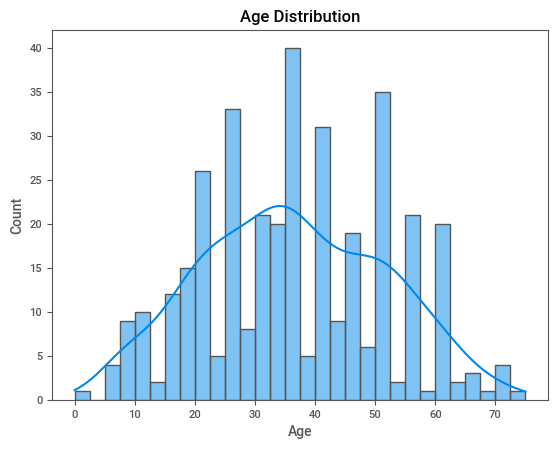

In [528]:
#the majority age was includes in between 20 to 50
sns.histplot(df['Age'],bins=30, kde=True)
plt.title("Age Distribution")
plt.show()

In [529]:
print(df['Age'].describe())

count    366.000000
mean      36.267760
std       15.156875
min        0.000000
25%       25.000000
50%       35.000000
75%       48.000000
max       75.000000
Name: Age, dtype: float64


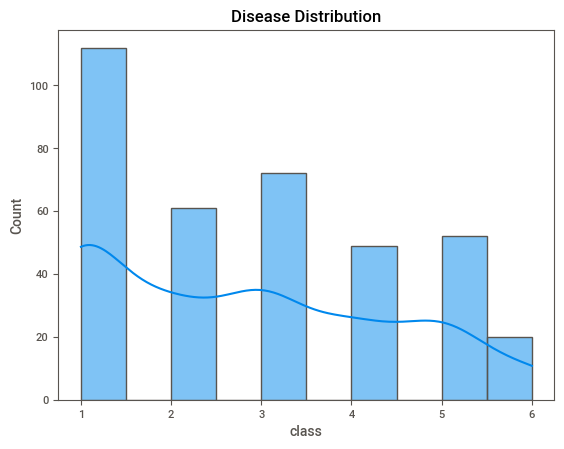

In [530]:
#the most common disease is 1 class 'psoriasis' 
sns.histplot(df['class'], kde=True)
plt.title("Disease Distribution")
plt.show()

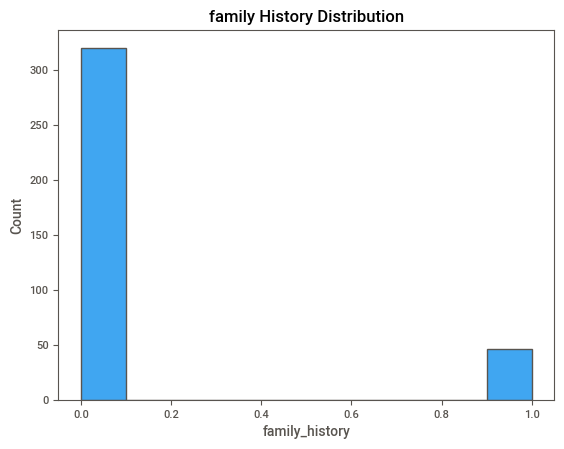

In [531]:
#0 - represents not have family history that is the most common
sns.histplot(df['family_history'])
plt.title("family History Distribution")
plt.show()

## Bivariate Analysis

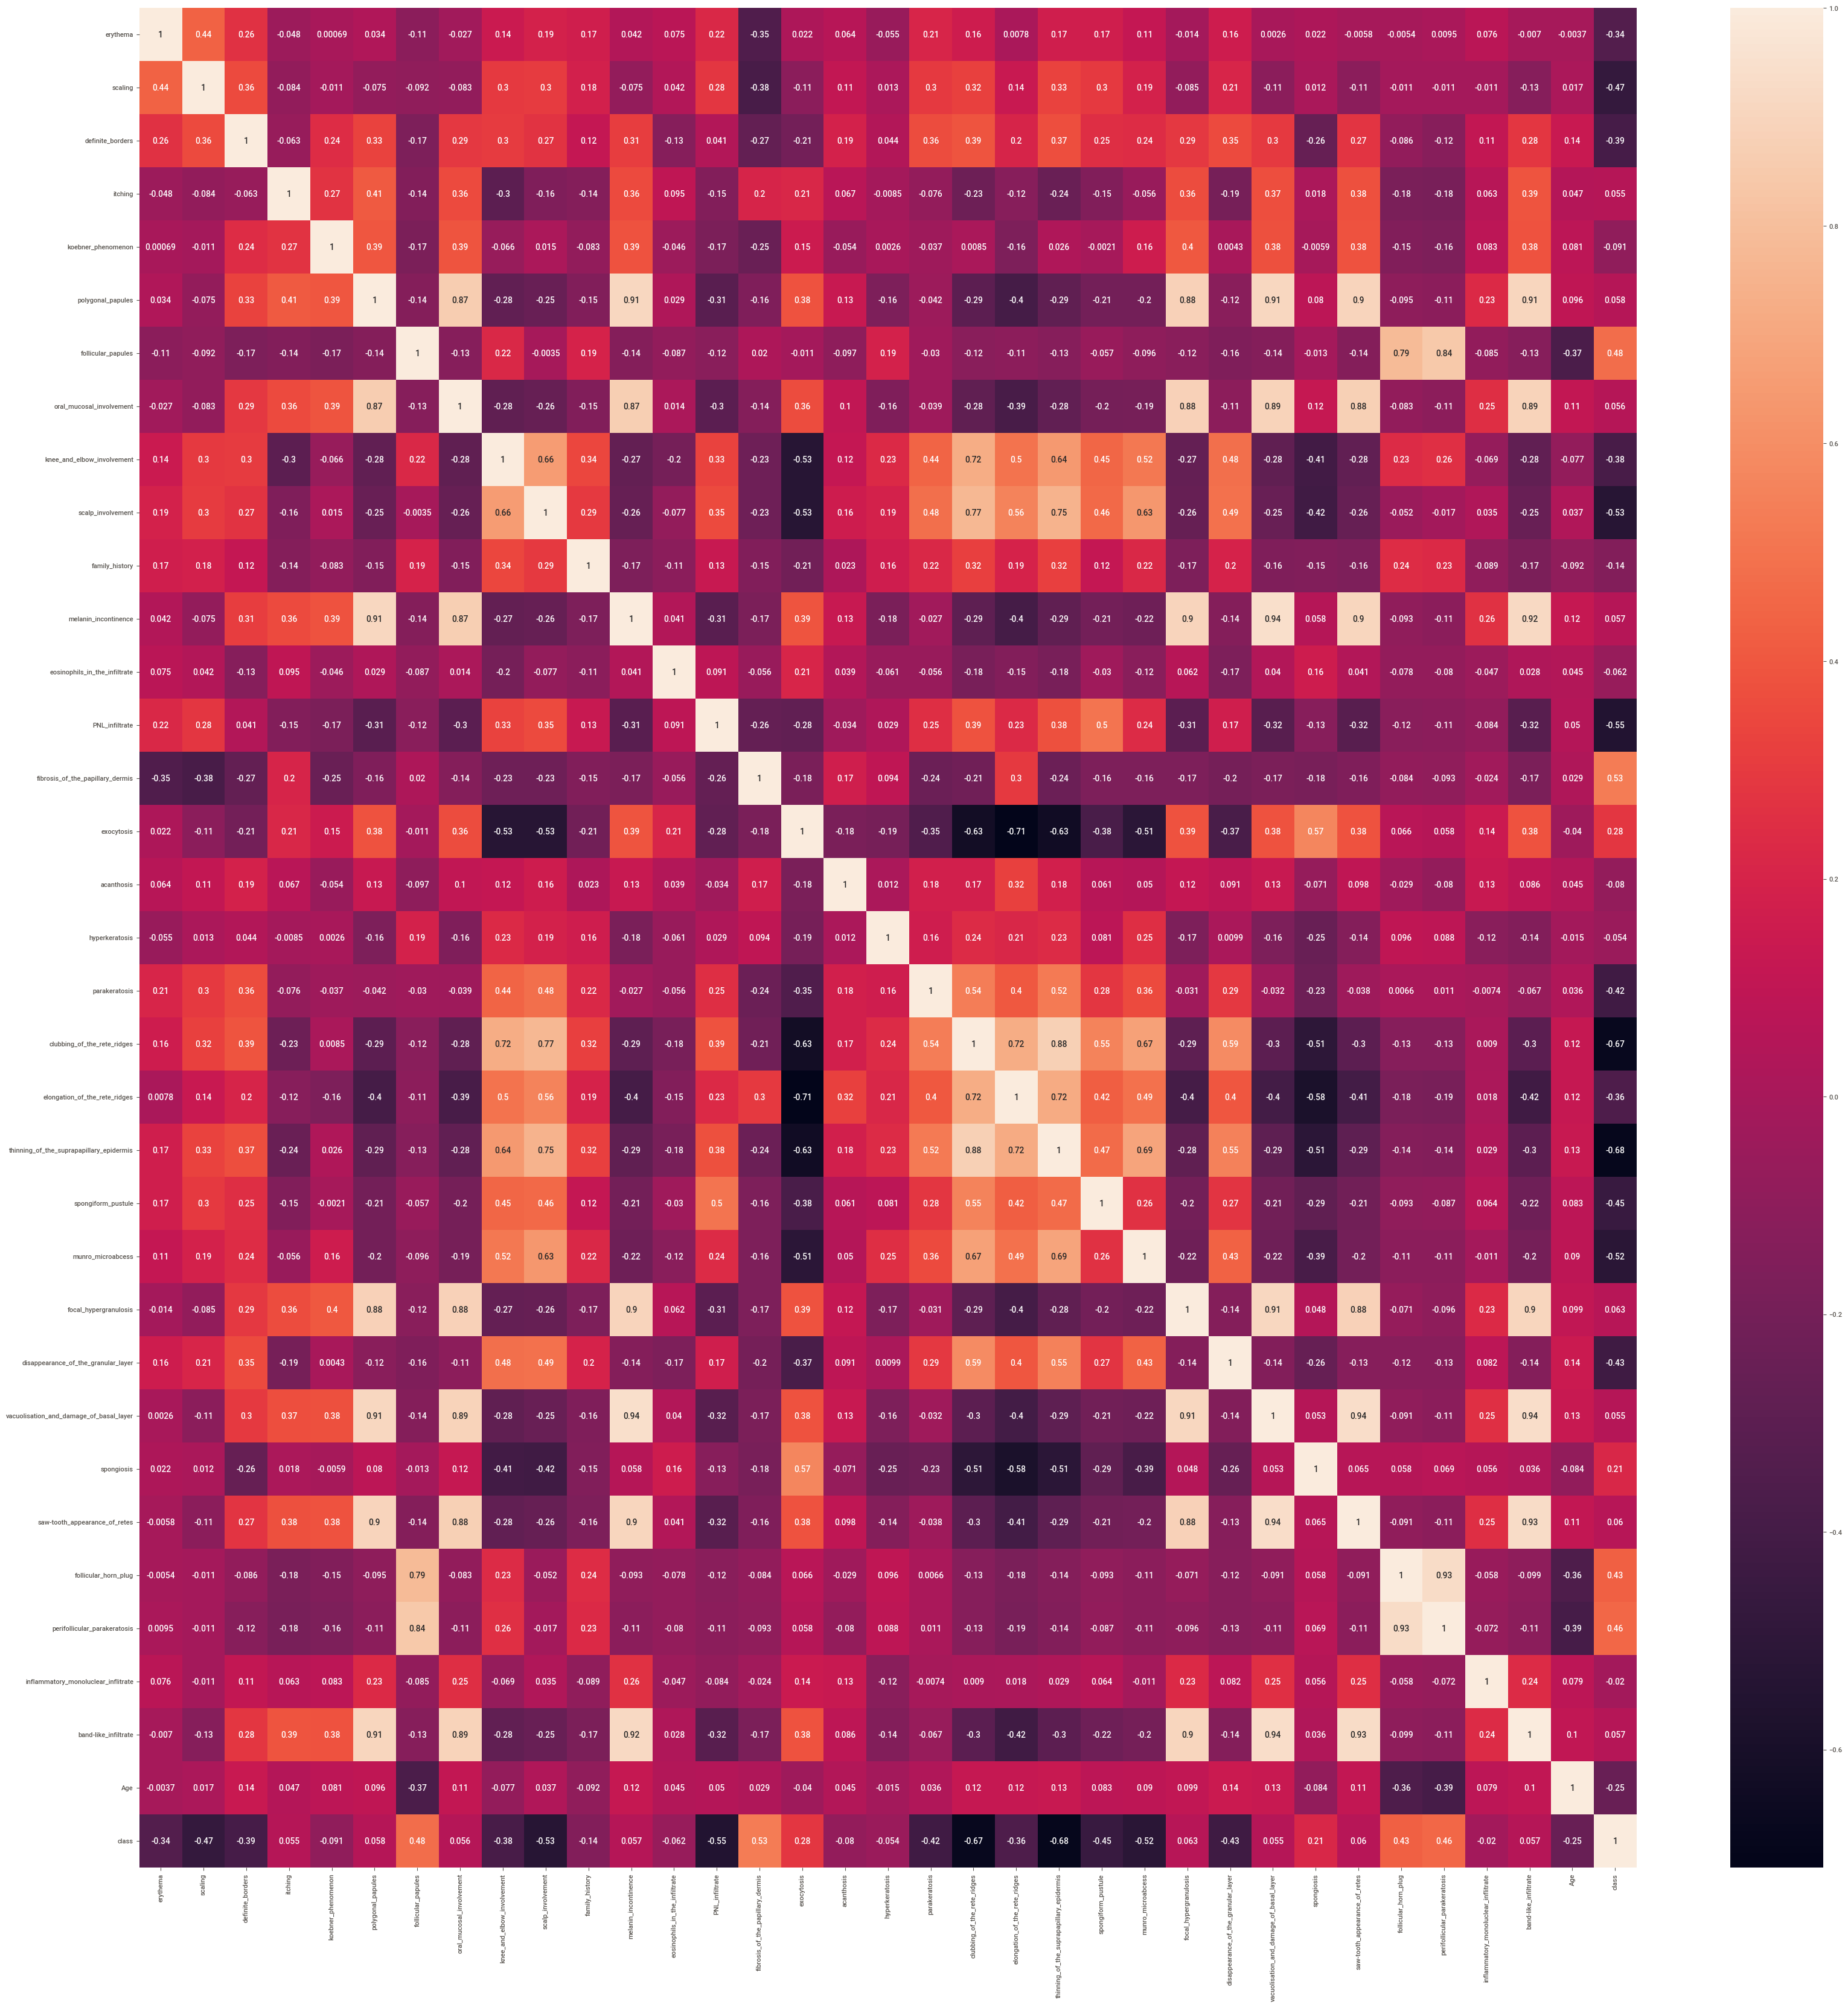

In [533]:
plt.figure(figsize=(40,40))
correlation_matrix=df.corr()
sns.heatmap((correlation_matrix),annot=True)
plt.show()

- the above heatmap represents some correlated columns
- but not removes because the user input must have 34 columns


## Train Test Split


In [535]:
# X includes the all coolumns exclde class
X=df.drop(columns=['class'],axis=1)
# y includes only class column 
y=df['class']

In [536]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 34 columns):
 #   Column                                    Non-Null Count  Dtype
---  ------                                    --------------  -----
 0   erythema                                  366 non-null    int64
 1   scaling                                   366 non-null    int64
 2   definite_borders                          366 non-null    int64
 3   itching                                   366 non-null    int64
 4   koebner_phenomenon                        366 non-null    int64
 5   polygonal_papules                         366 non-null    int64
 6   follicular_papules                        366 non-null    int64
 7   oral_mucosal_involvement                  366 non-null    int64
 8   knee_and_elbow_involvement                366 non-null    int64
 9   scalp_involvement                         366 non-null    int64
 10  family_history                            366 non-null    int6

In [537]:
y.info()

<class 'pandas.core.series.Series'>
RangeIndex: 366 entries, 0 to 365
Series name: class
Non-Null Count  Dtype
--------------  -----
366 non-null    int64
dtypes: int64(1)
memory usage: 3.0 KB


In [538]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,stratify=y,random_state=3)


In [539]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((292, 34), (74, 34), (292,), (74,))

In [540]:
print(type(X_train))

<class 'pandas.core.frame.DataFrame'>


 ## Model Creation and Evaluation

In [656]:
# Importing Models
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix,roc_auc_score
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
import warnings

## LogisticRegression Model

In [659]:
model_LR= LogisticRegression()
model_LR.fit(X_train,y_train)

LogisticRegression()

In [661]:
y_pred=model_LR.predict(X_test)
y_pred

array([5, 5, 1, 2, 4, 4, 4, 4, 3, 3, 2, 5, 5, 6, 3, 5, 4, 1, 1, 2, 1, 2,
       3, 2, 5, 5, 1, 3, 1, 1, 3, 4, 3, 2, 3, 3, 3, 3, 1, 6, 6, 1, 3, 1,
       5, 2, 1, 1, 2, 1, 1, 5, 2, 4, 1, 2, 3, 5, 1, 1, 2, 1, 1, 3, 4, 1,
       3, 6, 2, 2, 4, 1, 1, 1], dtype=int64)

In [733]:
y_test

203    5
264    5
320    1
5      2
168    4
      ..
76     2
8      4
105    1
205    1
42     1
Name: class, Length: 74, dtype: int64

In [665]:
from sklearn.metrics import accuracy_score
score=accuracy_score(y_test,y_pred)
print("The accuracy score is ",score)

The accuracy score is  0.9864864864864865


In [667]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        23
           2       0.92      1.00      0.96        12
           3       1.00      1.00      1.00        15
           4       1.00      0.90      0.95        10
           5       1.00      1.00      1.00        10
           6       1.00      1.00      1.00         4

    accuracy                           0.99        74
   macro avg       0.99      0.98      0.98        74
weighted avg       0.99      0.99      0.99        74



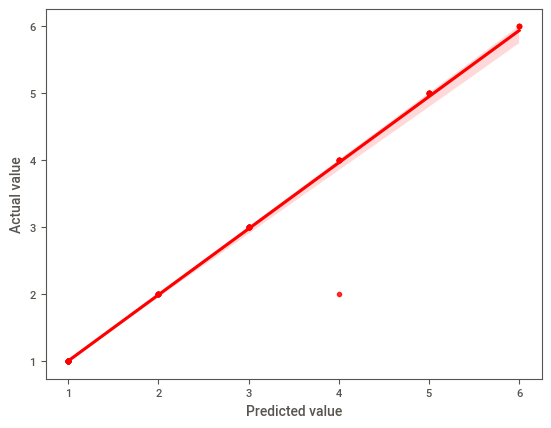

In [669]:
sns.regplot(x=y_test,y=y_pred, color='red')
plt.xlabel('Predicted value')
plt.ylabel('Actual value')
plt.show()

## DecisionTreeClassifier Model

In [672]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier(random_state=55)
dt.fit(X_train,y_train)

DecisionTreeClassifier(random_state=55)

In [674]:
y_pred=dt.predict(X_test)
y_pred

array([5, 5, 1, 2, 2, 4, 4, 4, 3, 3, 2, 5, 5, 1, 3, 5, 4, 1, 1, 2, 1, 2,
       3, 2, 5, 5, 1, 3, 1, 1, 3, 4, 3, 2, 3, 3, 3, 3, 1, 6, 6, 1, 3, 1,
       5, 2, 1, 1, 2, 1, 1, 5, 2, 4, 1, 2, 3, 5, 1, 1, 2, 1, 1, 3, 4, 1,
       3, 6, 2, 2, 4, 1, 1, 1], dtype=int64)

In [676]:
score=accuracy_score(y_test,y_pred)
print("The accuracy score is ",score)

The accuracy score is  0.9594594594594594


In [678]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           1       0.96      1.00      0.98        23
           2       0.86      1.00      0.92        12
           3       1.00      1.00      1.00        15
           4       1.00      0.80      0.89        10
           5       1.00      1.00      1.00        10
           6       1.00      0.75      0.86         4

    accuracy                           0.96        74
   macro avg       0.97      0.92      0.94        74
weighted avg       0.96      0.96      0.96        74



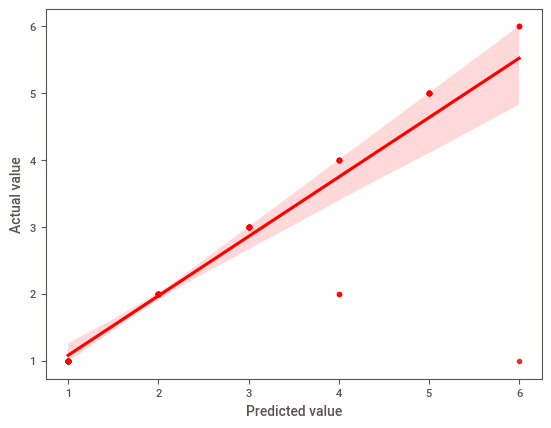

In [680]:
sns.regplot(x=y_test,y=y_pred, color='red')
plt.xlabel('Predicted value')
plt.ylabel('Actual value')
plt.show()

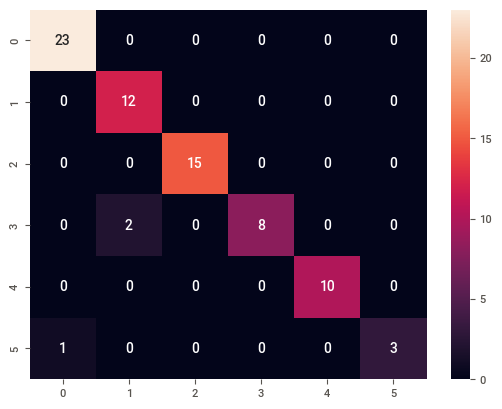

In [682]:
from sklearn.metrics import confusion_matrix
dt_cm=confusion_matrix(y_test,y_pred)
sns.heatmap(dt_cm,annot=True)
plt.show()

## RandomForestClassifer Model

In [685]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
rf.fit(X_train,y_train)
y_pred=rf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Random Forest:")
print(accuracy)

Random Forest:
0.9864864864864865


In [687]:
print(classification_report(y_test,y_pred)),

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        23
           2       0.92      1.00      0.96        12
           3       1.00      1.00      1.00        15
           4       1.00      0.90      0.95        10
           5       1.00      1.00      1.00        10
           6       1.00      1.00      1.00         4

    accuracy                           0.99        74
   macro avg       0.99      0.98      0.98        74
weighted avg       0.99      0.99      0.99        74



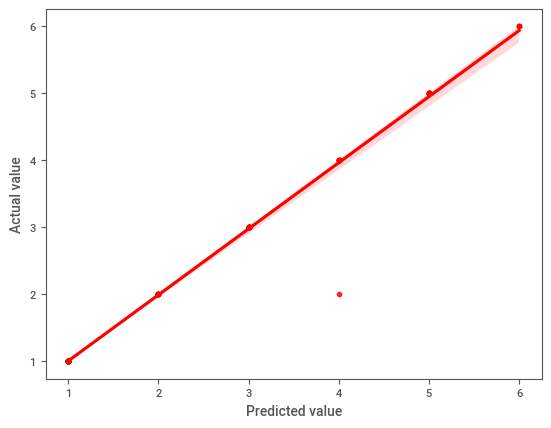

In [689]:
sns.regplot(x=y_test,y=y_pred, color='red')
plt.xlabel('Predicted value')
plt.ylabel('Actual value')
plt.show()

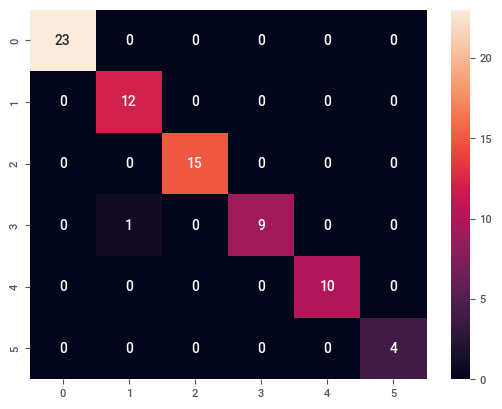

In [691]:
from sklearn.metrics import confusion_matrix
rf_cm=confusion_matrix(y_test,y_pred)
sns.heatmap(rf_cm,annot=True)
plt.show()

## SupportVectorClassifier Model

In [694]:
from sklearn.svm import SVC
svm=SVC()
svm.fit(X_train,y_train)
y_pred=svm.predict(X_test)
score=accuracy_score(y_test,y_pred)
print(score)

0.6891891891891891


In [696]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           1       0.83      0.87      0.85        23
           2       0.42      0.92      0.58        12
           3       1.00      1.00      1.00        15
           4       0.00      0.00      0.00        10
           5       1.00      0.10      0.18        10
           6       0.50      1.00      0.67         4

    accuracy                           0.69        74
   macro avg       0.63      0.65      0.55        74
weighted avg       0.69      0.69      0.62        74



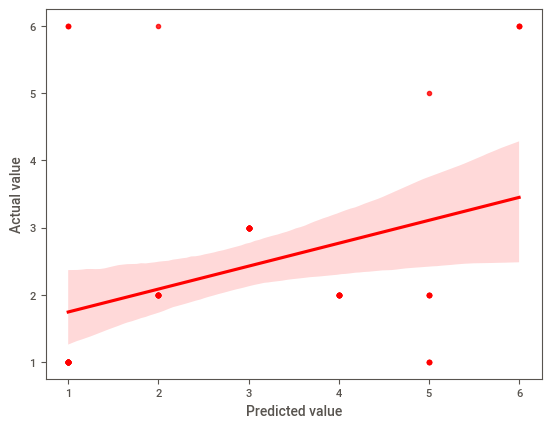

In [698]:
sns.regplot(x=y_test,y=y_pred, color='red')
plt.xlabel('Predicted value')
plt.ylabel('Actual value')
plt.show()

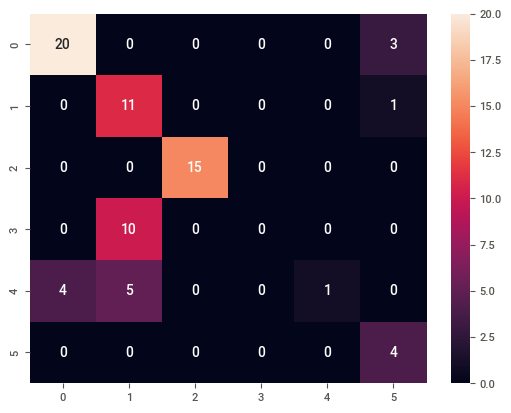

In [700]:
from sklearn.metrics import confusion_matrix
svm_cm=confusion_matrix(y_test,y_pred)
sns.heatmap(svm_cm,annot=True)
plt.show()

## KNN Classifier Model


In [703]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()
knn.fit(X_train, y_train)
y_pred=knn.predict(X_test)
score=accuracy_score(y_test,y_pred)
print(score)

0.8378378378378378


In [708]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           1       1.00      0.83      0.90        23
           2       0.69      0.75      0.72        12
           3       1.00      1.00      1.00        15
           4       0.75      0.60      0.67        10
           5       0.82      0.90      0.86        10
           6       0.50      1.00      0.67         4

    accuracy                           0.84        74
   macro avg       0.79      0.85      0.80        74
weighted avg       0.86      0.84      0.84        74



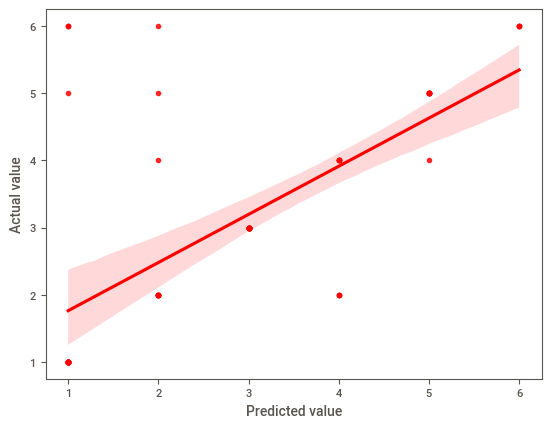

In [710]:
sns.regplot(x=y_test,y=y_pred, color='red')
plt.xlabel('Predicted value')
plt.ylabel('Actual value')
plt.show()

## GradientBoostingClassifier Model

In [713]:
from sklearn.ensemble import GradientBoostingClassifier

# Initialize the model
gb_model = GradientBoostingClassifier(
    n_estimators=100,   # Number of boosting stages
    learning_rate=0.1,  # Step size shrinkage
    max_depth=3,        # Maximum depth of individual estimators
    random_state=42     # Ensures reproducibility
)

# Train the model
gb_model.fit(X_train, y_train)

# Make predictions
y_pred = gb_model.predict(X_test)
score=accuracy_score(y_test,y_pred)
print(score)


0.9864864864864865


In [715]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        23
           2       0.92      1.00      0.96        12
           3       1.00      1.00      1.00        15
           4       1.00      0.90      0.95        10
           5       1.00      1.00      1.00        10
           6       1.00      1.00      1.00         4

    accuracy                           0.99        74
   macro avg       0.99      0.98      0.98        74
weighted avg       0.99      0.99      0.99        74



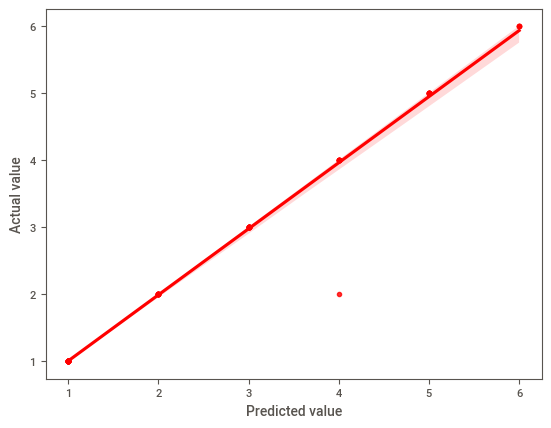

In [717]:
sns.regplot(x=y_test,y=y_pred, color='red')
plt.xlabel('Predicted value')
plt.ylabel('Actual value')
plt.show()

In [719]:
models = {
    '\nLogistic Regression': LogisticRegression(),
    '\nDecision Tree':DecisionTreeClassifier(),
    '\nRandom Forest': RandomForestClassifier(),
    '\nSupport Vector Machine':SVC(),
    '\nK-Nearest Neighbors':KNeighborsClassifier(),
    '\nGradient Boosting':GradientBoostingClassifier(),
}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred= model.predict(X_test)
    print(f'{name} Report:')
    print(classification_report(y_test, y_pred))
    print('Accuracy:', accuracy_score(y_test, y_pred))
    print('Confusion Matrix:')
    print(confusion_matrix(y_test, y_pred))


Logistic Regression Report:
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        23
           2       0.92      1.00      0.96        12
           3       1.00      1.00      1.00        15
           4       1.00      0.90      0.95        10
           5       1.00      1.00      1.00        10
           6       1.00      1.00      1.00         4

    accuracy                           0.99        74
   macro avg       0.99      0.98      0.98        74
weighted avg       0.99      0.99      0.99        74

Accuracy: 0.9864864864864865
Confusion Matrix:
[[23  0  0  0  0  0]
 [ 0 12  0  0  0  0]
 [ 0  0 15  0  0  0]
 [ 0  1  0  9  0  0]
 [ 0  0  0  0 10  0]
 [ 0  0  0  0  0  4]]

Decision Tree Report:
              precision    recall  f1-score   support

           1       0.96      1.00      0.98        23
           2       0.92      1.00      0.96        12
           3       1.00      1.00      1.00        15
           4  

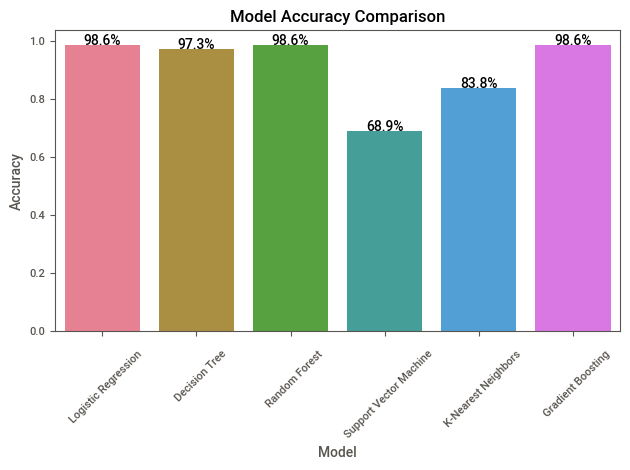

In [729]:
# Collect accuracy results
accuracy_df = pd.DataFrame([{"Model": name, "Accuracy": accuracy_score(y_test, model.fit(X_train, y_train).predict(X_test))} 
                            for name, model in models.items()])

# Plot accuracy with percentage labels
sns.barplot(x="Model", y="Accuracy", data=accuracy_df,palette="husl")
plt.title("Model Accuracy Comparison")
plt.xticks(rotation=45)

# Add percentage labels
for bar in plt.gca().patches:
    plt.gca().annotate(f'{bar.get_height() * 100:.1f}%', (bar.get_x() + bar.get_width() / 2, bar.get_height()), ha='center')

plt.tight_layout()
plt.show()

## Conclusion 

The goal of the PRCP-1027-Skin Disorder project was to develop a predictive model capable of identifying various skin diseases based on 34 clinical and histopathological attributes. After comprehensive data analysis, multiple machine learning models were trained and evaluated for performance.

The models evaluated included:

- Logistic Regression: 98.6% accuracy
- Decision Tree: 97.3% accuracy
- Random Forest: 98.6% accuracy
- Support Vector Machine (SVM): 68.9% accuracy
- K-Nearest Neighbors (KNN): 83.8% accuracy
- Gradient Boosting: 98.6% accuracy

### Key Findings:

Top-Performing Models: Logistic Regression, Random Forest, and Gradient Boosting achieved the highest accuracy of 98.6%, indicating their superior ability to classify skin disorders in this dataset.

Underperformance: The Support Vector Machine (SVM) showed significantly lower accuracy at 68.9%, indicating it may not be well-suited for this dataset's complexity.

Balanced Performance: The Decision Tree model also performed well with 97.3% accuracy, but it slightly lagged behind the top models.
Best Model Recommendation:

Based on accuracy, Logistic Regression, Random Forest, and Gradient Boosting are recommended for production deployment due to their high and consistent performance.

### Challenges and Solutions:

Class Imbalance: Techniques like stratified sampling were applied to ensure balanced representation across disease classes.
Data Scaling: Since most features were scaled between 0-3, standardization was minimal, focusing more on feature importance.
### Final Suggestion:

The results demonstrate the potential for machine learning to assist doctors in early and accurate diagnosis of skin disorders, minimizing the need for invasive procedures like biopsies. Further exploration with ensemble techniques could improve performance even further.



In [756]:
import pickle

In [760]:
pickle.dump(model_LR,open('lrmodel.pkl','wb'))

In [764]:
pickled_model=pickle.load(open('lrmodel.pkl','rb'))